In [10]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

d:\measuring\data


In [5]:
#print '{:.1f},{:.1f},{:.1f},{:.1f},{:.1f},{:.1f}'.format(nvlevels.get_ES_ExEy(48.95,55.09, transitions=True))
#nvlevels.get_ExEy_from_two_levels(49.4,0,54.9,2, precision=0.03)
nvlevels.get_ES_ExEy(48.95,55.09, transitions=True)

array([ 44.30662088,  44.51912691,  48.94546334,  55.08295099,
        55.25591578,  58.1259221 ])

In [2]:
Ex=56.05+0.065  # 65 MHz = offset between the 2 wavemeters
Ey = 55.54+0.065 #
Ep = 48.77+0.3
Ex_cal, Ey_cal = nvlevels.get_ExEy_from_two_levels(Ep,0,Ex,3,precision=0.01)
print 'Meas. strain splitting :', Ex-Ey, ', compare to cal. :', Ex_cal-Ey_cal

Meas. strain splitting : 0.51 , compare to cal. : 0.530265132566


In [8]:
ssro.ssrocalib(plot_photon_ms0=False)
#ssro.ssrocalib(folder=tb.data_from_time('093549'))


KeyError: "Unable to open object (Object 'ms0' doesn't exist)"

Converged with chi squared  295962670.888
degrees of freedom, dof  39
RMS of residuals (i.e. sqrt(chisq/dof))  2754.77520553
Reduced chisq (i.e. variance of residuals)  7588786.43303

fitted parameters at minimum, with 68% C.I.:
 0 a            102.469148 +/- 743.677324
 1 A          192410.436119 +/- 9282.058244
 2 tau            7.380262 +/-   0.328758

correlation matrix:
               a         A         tau       
         a  1.000000
         A  0.475845  1.000000
       tau -0.705465 -0.914648  1.000000

Converged with chi squared  127276430.324
degrees of freedom, dof  40
RMS of residuals (i.e. sqrt(chisq/dof))  1783.79111953
Reduced chisq (i.e. variance of residuals)  3181910.7581

fitted parameters at minimum, with 68% C.I.:
 0 a            209.147069 +/- 333.903831
 1 A          627948.064362 +/- 18439.122635
 2 tau            3.592363 +/-   0.060818

correlation matrix:
               a         A         tau       
         a  1.000000
         A  0.329648  1.000000
      

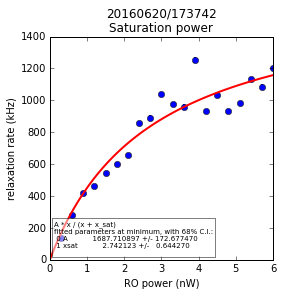

In [13]:
execfile(r'D:\measuring\analysis\scripts\ssro\ssro_vs_power.py')

In [15]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')

folder= tb.latest_data('FastSSRO')
#folder = r'D:\measuring\data\20141021\143116_PQPulsarMeasurement_FastSSROCalib_Pippin_SIL3_Pulse_AOM'
#folder=tb.data_from_time('173053')
a=pqsequence.FastSSROAnalysis(folder)#, pq_folder='bs_remote')
a.get_sweep_pts()
a.get_readout_results('ssro')
a.get_sweep_idxs(noof_syncs_per_sweep_pt=1)
a.get_fastssro_results(channel=0,pq_binsize_ns=1.0, hist_binsize_ns=100.0)


d:\measuring\data
WARNING last sync number (29999) != noof reps (30000)! Sync error?


Sweep point 0 ignored
Converged with chi squared  2.99780643255
degrees of freedom, dof  6
RMS of residuals (i.e. sqrt(chisq/dof))  0.70684821951
Reduced chisq (i.e. variance of residuals)  0.499634405424

fitted parameters at minimum, with 68% C.I.:
 0 a             11.848045 +/-   0.395874
 1 A             42.837178 +/-   2.971880
 2 tau            2.398530 +/-   0.204435

correlation matrix:
               a         A         tau       
         a  1.000000
         A  0.380387  1.000000
       tau -0.685761 -0.863153  1.000000



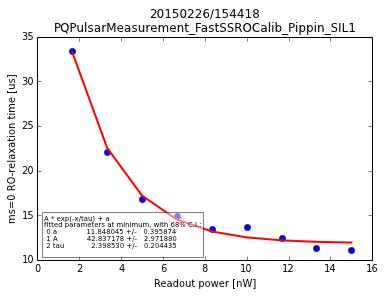

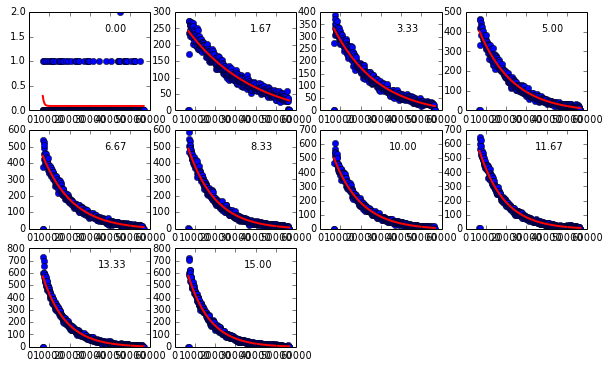

In [10]:
d=a.plot_relaxation_vs_sweep(0,'RO')

(0.5, 1.0)

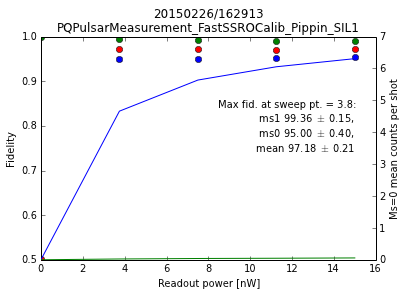

In [16]:
ax=a.plot_fidelity_cpsh_vs_sweep(RO_length_ns=3500, ret = 'ax')
ax.set_ylim(0.5,1.0)

(0.9, 1.01)

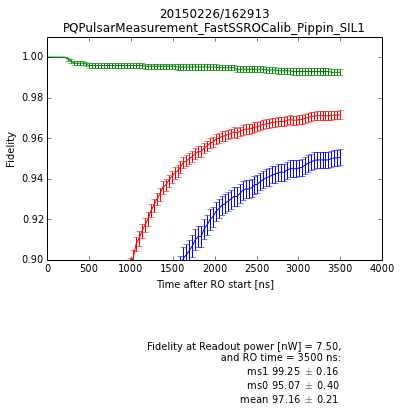

In [17]:
sweep_index = 2
ax=a.plot_mean_fidelity(sweep_index, RO_length_ns=3500, ret='ax')
ax.set_ylim(0.9,1.01)

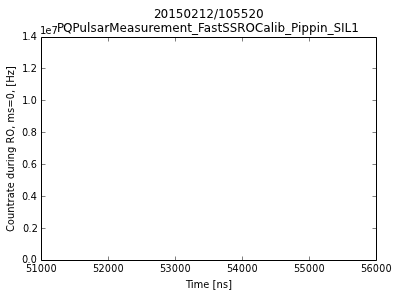

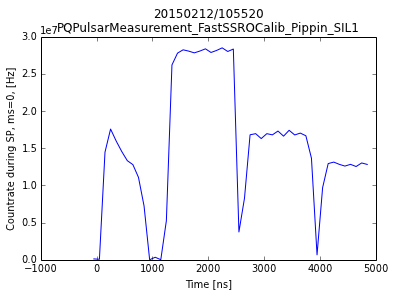

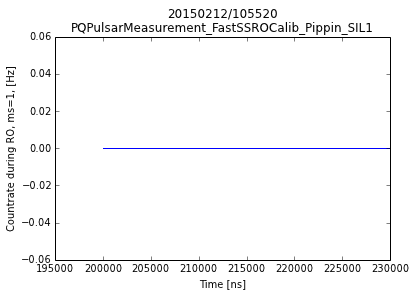

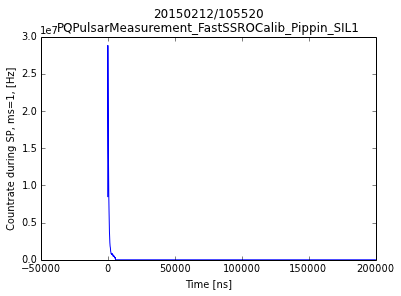

In [18]:
sweep_index = 1
a.extra_time_ns=200e-9
ax=a.plot_relaxation(sweep_index,ms=0, st='RO', ret='ax')
ax.set_xlim(51e3, 56e3)
a.plot_relaxation(sweep_index,ms=0, st='SP')
a.plot_relaxation(sweep_index,ms=1, st='RO')
a.plot_relaxation(sweep_index,ms=1, st='SP')


NameError: global name 'sweep_CR_hist' is not defined

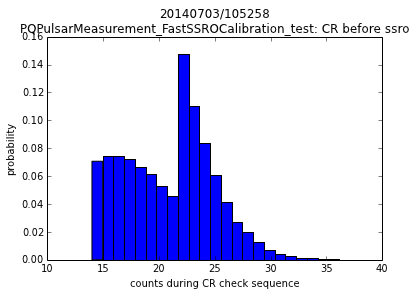

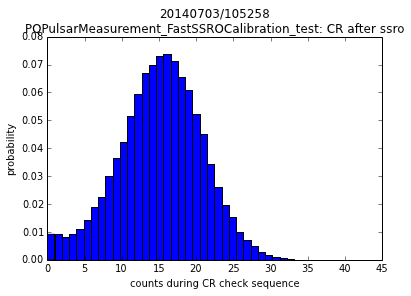

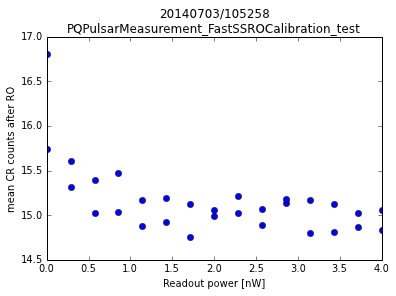

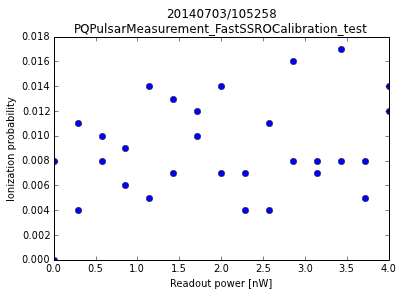

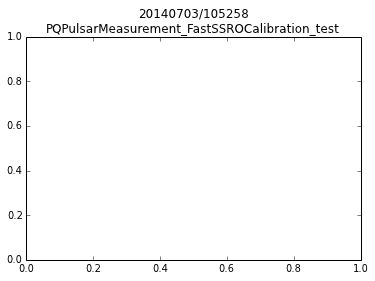

In [16]:
a.get_cr_results('ssro')
a.plot_cr_vs_sweep()

(<matplotlib.figure.Figure at 0x1170df50>,
 (<matplotlib.axes.AxesSubplot at 0x11d383f0>,
  <matplotlib.axes.AxesSubplot at 0xb60cf50>))

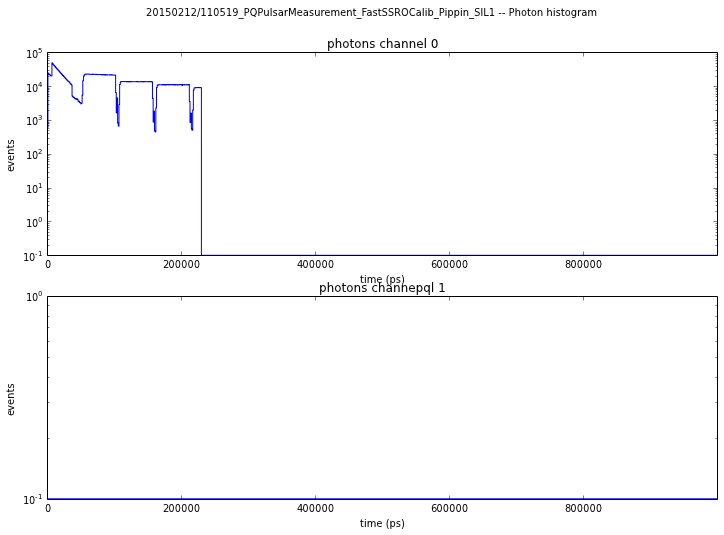

In [34]:
pq_tools.plot_photon_hist(a.pqf)

<Container object of 1000 artists>

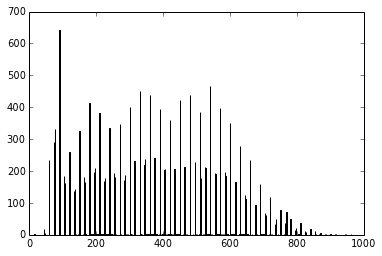

In [95]:
bar(arange(1000),a.pqf['PQ_hist_lengths'][:1000])

In [182]:
a._get_RO_window(1,5)

(152000.0, 100000.0)

In [229]:
a.hist_binsize_ns=1
x,y=a._get_relaxation(1,5,60000,100000)

In [230]:
sum(x)/100e-6/5000

422.0

In [211]:
f1,_tmp=a._get_fidelity_and_mean_cpsh(1,5,152000,3000)

len vsync 4
unique vsync 2


In [199]:
4/5000.+f1

0.9988

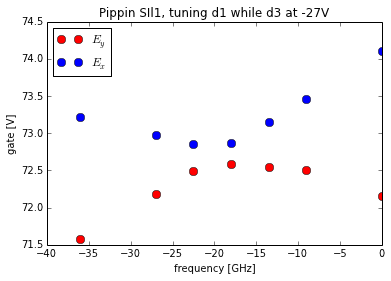

In [4]:
execfile(r'D:\measuring\analysis\scripts\laser_scan\plot_simplest_gate_tuning.py')

In [31]:
import h5py
datafile = r'X:\data\20140529\185317_Bell_BS_test_BS_lt1_tail_Pippin_Sil3_0V'
datafile = r'D:\measuring\data\20150212\110519_PQPulsarMeasurement_FastSSROCalib_Pippin_SIL1'
data = h5py.File(datafile,'r')
times = data['PQ_sync_time-1'].value
sync_numbers = data['PQ_sync_number-1'].value
channel = data['PQ_channel-1'].value

IOError: unable to open file (File accessibilty: Unable to open file)

(array([  1.00000000e+00,   5.88000000e+02,   9.60000000e+02,
         8.39000000e+02,   8.29000000e+02,   7.53000000e+02,
         6.71000000e+02,   6.76000000e+02,   6.22000000e+02,
         6.26000000e+02,   6.28000000e+02,   5.38000000e+02,
         6.07000000e+02,   5.69000000e+02,   4.89000000e+02,
         5.11000000e+02,   4.81000000e+02,   4.55000000e+02,
         4.34000000e+02,   4.44000000e+02,   4.17000000e+02,
         3.95000000e+02,   3.55000000e+02,   3.82000000e+02,
         3.81000000e+02,   3.39000000e+02,   3.57000000e+02,
         3.54000000e+02,   3.16000000e+02,   2.88000000e+02,
         3.18000000e+02,   2.99000000e+02,   3.09000000e+02,
         2.53000000e+02,   2.73000000e+02,   2.29000000e+02,
         2.58000000e+02,   2.28000000e+02,   2.33000000e+02,
         2.25000000e+02,   1.93000000e+02,   1.80000000e+02,
         1.89000000e+02,   1.89000000e+02,   1.94000000e+02,
         1.93000000e+02,   1.98000000e+02,   1.61000000e+02,
         1.41000000e+02

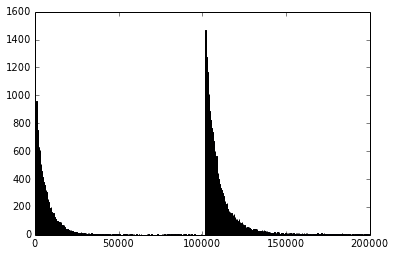

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(times,1000)

(array([ 146.,   92.,   40.,   98.,   54.,   93.,  127.,  116.,  105.,  129.]),
 array([  1. ,   5.6,  10.2,  14.8,  19.4,  24. ,  28.6,  33.2,  37.8,
        42.4,  47. ]),
 <a list of 10 Patch objects>)

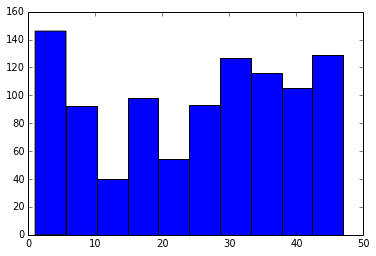

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(sync_numbers[0:1000])

In [104]:
np.max(channel)

0

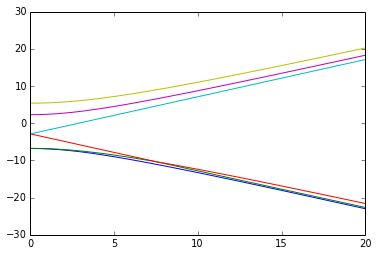

In [121]:
x,y=nvlevels.get_levels()
plot(x,y)


In [126]:
sort(nvlevels.get_ES(E_field=[7.2/2,0,0])[0])

array([-8.04687695, -7.75761861, -6.46424482,  0.71723145,  3.54112178,
        6.37038716])

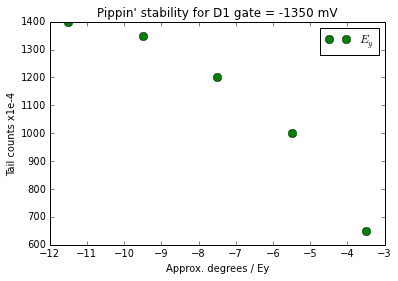

In [20]:
execfile(r'D:\measuring\analysis\scripts\laser_scan\plot_simplest_gate_tuning.py')

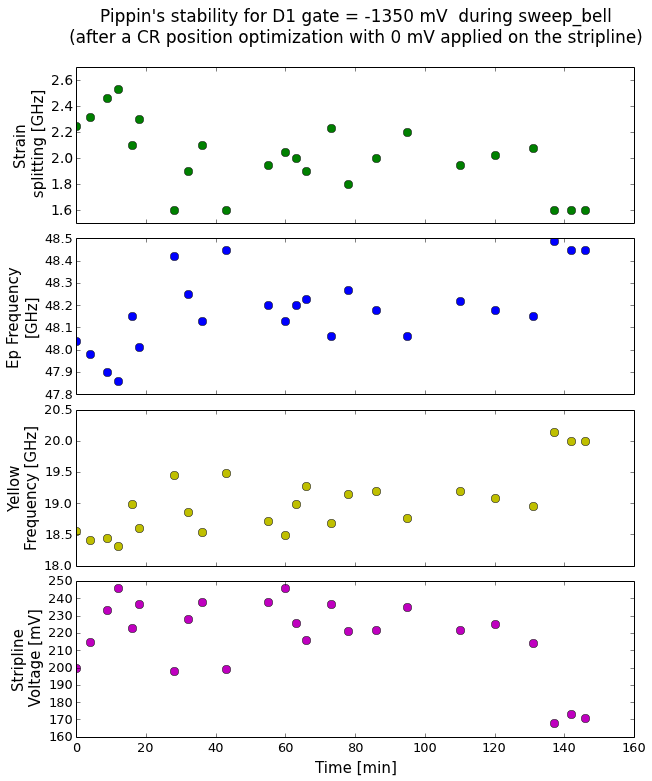

In [36]:
execfile(r'D:\measuring\data\20141013\Pippin_stability.py')

In [93]:
print (17971382612-15396983926)


2574398686
